Cora()
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


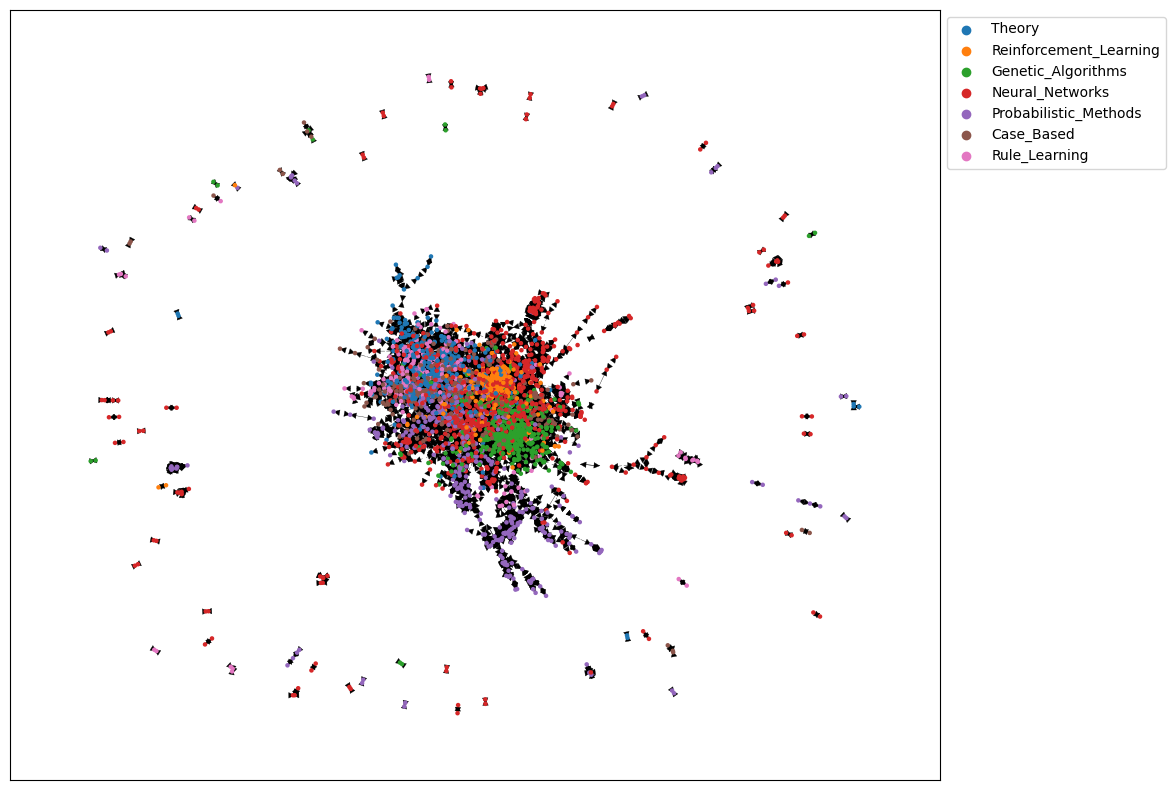

In [6]:
proteins_dataset = TUDataset(root="proteins", name="PROTEINS_full")
proteins_dataset

Processing...
Done!


PROTEINS_full(1113)

In [7]:
from torch_geometric.loader import DataLoader

protein_loader = DataLoader(proteins_dataset, batch_size=32, shuffle=True)
for batch in protein_loader:
    print(batch)

DataBatch(edge_index=[2, 7698], x=[1990, 3], y=[32], batch=[1990], ptr=[33])
DataBatch(edge_index=[2, 3874], x=[991, 3], y=[32], batch=[991], ptr=[33])
DataBatch(edge_index=[2, 4140], x=[1095, 3], y=[32], batch=[1095], ptr=[33])
DataBatch(edge_index=[2, 4678], x=[1283, 3], y=[32], batch=[1283], ptr=[33])
DataBatch(edge_index=[2, 6348], x=[1722, 3], y=[32], batch=[1722], ptr=[33])
DataBatch(edge_index=[2, 3384], x=[899, 3], y=[32], batch=[899], ptr=[33])
DataBatch(edge_index=[2, 4424], x=[1132, 3], y=[32], batch=[1132], ptr=[33])
DataBatch(edge_index=[2, 5082], x=[1382, 3], y=[32], batch=[1382], ptr=[33])
DataBatch(edge_index=[2, 3518], x=[958, 3], y=[32], batch=[958], ptr=[33])
DataBatch(edge_index=[2, 4644], x=[1301, 3], y=[32], batch=[1301], ptr=[33])
DataBatch(edge_index=[2, 3868], x=[1045, 3], y=[32], batch=[1045], ptr=[33])
DataBatch(edge_index=[2, 4172], x=[1073, 3], y=[32], batch=[1073], ptr=[33])
DataBatch(edge_index=[2, 3430], x=[896, 3], y=[32], batch=[896], ptr=[33])
DataBat

### Heterogeneous data

In [9]:
from torch_geometric.data import HeteroData
import torch

num_users = 10
num_posts = 40

user_features = torch.randn(num_users, 8)
post_features = torch.randn(num_posts, 5)

follows_edges = torch.tensor([[0,1], [1,2], [2,3], [3,4], [4,5]])
posted_by_edges = torch.tensor([[0,1], [1,0], [3,1]])
liked_by_edges = torch.tensor([[3,1], [5,6], [6,5], [4,2]])

follows_features = torch.randn(follows_edges.shape[0], 3)
posted_by_features = torch.randn(posted_by_edges.shape[0], 2)
liked_by_features = torch.randn(liked_by_edges.shape[0], 1)

user_features

tensor([[ 0.5064,  1.6243,  0.3065, -1.7819,  0.0220, -0.0772, -0.2615,  0.3111],
        [-2.0729, -1.2584, -0.7081, -1.2769,  1.9015,  0.1744, -0.6425,  0.9536],
        [ 1.4504, -0.4292,  0.4401, -1.4881, -2.1037, -1.1553, -1.6685,  0.5823],
        [ 0.7167, -0.0181, -0.8407,  0.5043,  0.5901,  0.3461, -0.0069,  1.3465],
        [-0.3492, -0.2030, -1.0906, -0.3921, -0.1725,  0.1588,  0.7085,  0.1434],
        [ 0.5065, -0.0817, -0.9116, -0.9306, -0.9874, -1.3714,  0.0442,  0.6624],
        [ 1.4840, -0.0076,  0.2346, -0.9010,  0.1006, -0.7774, -0.1727,  0.5890],
        [ 1.4147,  1.4523,  0.1195, -0.4957,  0.4395, -0.3846, -1.0443, -0.2648],
        [-0.6138, -0.8514, -1.1200, -1.6925,  0.2772, -0.5243, -0.7510, -1.0818],
        [ 0.7838, -0.2744, -1.1437, -0.4197, -0.0592,  1.0230,  2.4396, -1.1250]])

In [10]:
social_net_data = HeteroData()

social_net_data["user"].x = user_features
social_net_data["post"].x = post_features

social_net_data["user", "followers", "user"].edge_index = follows_edges.t()
social_net_data["post", "posted_by", "user"].edge_index = posted_by_edges.t()
social_net_data["post", "liked_by", "user"].edge_index = liked_by_edges.t()

social_net_data["user", "followers", "user"].edge_attr = follows_features
social_net_data["user", "followers", "user"].edge_attr = posted_by_features
social_net_data["user", "followers", "user"].edge_attr = liked_by_features

print(social_net_data)




HeteroData(
  user={ x=[10, 8] },
  post={ x=[40, 5] },
  (user, followers, user)={
    edge_index=[2, 5],
    edge_attr=[4, 1],
  },
  (post, posted_by, user)={ edge_index=[2, 3] },
  (post, liked_by, user)={ edge_index=[2, 4] }
)
